In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



In [ ]:
# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/bharatpurohit97/StockPrediction/master/RNN-GoogleStockPrediction/dataset/GoogleStockPrice_Train.csv')  # Replace 'google_stock_prices.csv' with your dataset file

# Preprocess the dataset
dataset['Close'] = dataset['Close'].str.replace(',', '').astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset["Close"].values.reshape(-1, 1))

# Split the dataset into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]



In [ ]:
# Prepare the data for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)



In [ ]:
sequence_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the RNN model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
32/32 [==============================] - 7s 23ms/step - loss: 0.0350
Epoch 2/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 3/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0050
Epoch 4/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 5/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0042
Epoch 6/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0038
Epoch 7/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0038
Epoch 8/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0038
Epoch 9/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 10/10
32/32 [==============================] - 0s 15ms/step - loss: 0.0032


In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert the predictions to their original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)



8/8 [==============================] - 0s 7ms/step


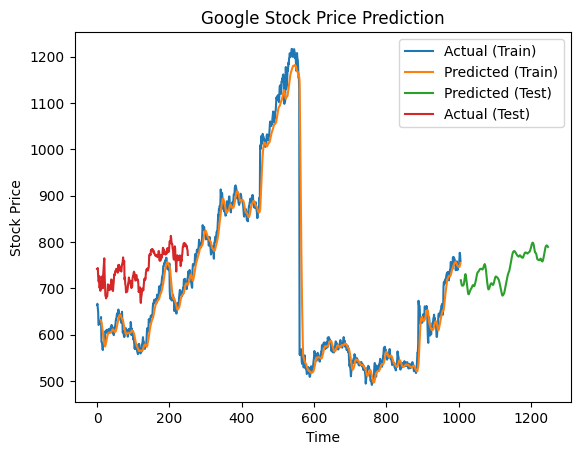

In [ ]:
# Plot the results
plt.plot(dataset['Close'].values[:train_size], label='Actual (Train)')
plt.plot(range(sequence_length, sequence_length + len(train_predictions)), train_predictions, label='Predicted (Train)')
plt.plot(range(train_size, train_size + len(test_predictions)), test_predictions, label='Predicted (Test)')
plt.plot(dataset['Close'].values[train_size:], label='Actual (Test)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()
